In [3]:
import sys
from pathlib import Path
  
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
import torch  
import cv2
import random

%load_ext autoreload
%autoreload 2

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True, precision=3)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
# Add project root directory to Python path to allow importing from src folder
notebook_dir = Path("__file__").resolve().parent
project_root = Path.cwd().parent
sys.path.append(str(project_root))

In [5]:
print(torch.cuda.is_available())

True


In [58]:
# import utils

from src.utils_classical import feature_reduction, split_data, generate_objective
from src.utils_plotting import plot_tsne, plot_umap, create_classification_report

In [43]:
# Read dataset
from src.utils_data import FEATURE_DATA_FOLDER, PLANT_CLASS_DICT

feature_dataset_path: Path = FEATURE_DATA_FOLDER / "feature_dataset.csv"
df = pd.read_csv(feature_dataset_path)
df.head()

,image_filename,class_name,class_number,rgb_0_mean,rgb_0_std,rgb_0_skewness,rgb_1_mean,rgb_1_std,rgb_1_skewness,rgb_2_mean,rgb_2_std,rgb_2_skewness,hsv_0_mean,hsv_0_std,hsv_0_skewness,hsv_1_mean,hsv_1_std,hsv_1_skewness,hsv_2_mean,hsv_2_std,hsv_2_skewness,lab_0_mean,lab_0_std,lab_0_skewness,lab_1_mean,lab_1_std,lab_1_skewness,lab_2_mean,lab_2_std,lab_2_skewness,rgb_0_hist_0,rgb_0_hist_1,rgb_0_hist_2,rgb_0_hist_3,rgb_0_hist_4,rgb_0_hist_5,rgb_0_hist_6,rgb_0_hist_7,rgb_0_hist_8,rgb_0_hist_9,rgb_0_hist_10,rgb_0_hist_11,rgb_0_hist_12,rgb_0_hist_13,rgb_0_hist_14,rgb_0_hist_15,rgb_0_hist_16,rgb_0_hist_17,rgb_0_hist_18,rgb_0_hist_19,rgb_0_hist_20,rgb_0_hist_21,rgb_0_hist_22,rgb_0_hist_23,rgb_0_hist_24,rgb_0_hist_25,rgb_0_hist_26,rgb_0_hist_27,rgb_0_hist_28,rgb_0_hist_29,rgb_0_hist_30,rgb_0_hist_31,rgb_1_hist_0,rgb_1_hist_1,rgb_1_hist_2,rgb_1_hist_3,rgb_1_hist_4,rgb_1_hist_5,rgb_1_hist_6,rgb_1_hist_7,rgb_1_hist_8,rgb_1_hist_9,rgb_1_hist_10,rgb_1_hist_11,rgb_1_hist_12,rgb_1_hist_13,rgb_1_hist_14,rgb_1_hist_15,rgb_1_hist_16,rgb_1_hist_17,rgb_1_hist_18,rgb_1_hist_19,rgb_1_hist_20,rgb_1_hist_21,rgb_1_hist_22,rgb_1_hist_23,rgb_1_hist_24,rgb_1_hist_25,rgb_1_hist_26,rgb_1_hist_27,rgb_1_hist_28,rgb_1_hist_29,rgb_1_hist_30,rgb_1_hist_31,rgb_2_hist_0,rgb_2_hist_1,rgb_2_hist_2,rgb_2_hist_3,rgb_2_hist_4,rgb_2_hist_5,rgb_2_hist_6,rgb_2_hist_7,rgb_2_hist_8,rgb_2_hist_9,rgb_2_hist_10,rgb_2_hist_11,rgb_2_hist_12,rgb_2_hist_13,rgb_2_hist_14,rgb_2_hist_15,rgb_2_hist_16,rgb_2_hist_17,rgb_2_hist_18,rgb_2_hist_19,rgb_2_hist_20,rgb_2_hist_21,rgb_2_hist_22,rgb_2_hist_23,rgb_2_hist_24,rgb_2_hist_25,rgb_2_hist_26,rgb_2_hist_27,rgb_2_hist_28,rgb_2_hist_29,rgb_2_hist_30,rgb_2_hist_31,hsv_0_hist_0,hsv_0_hist_1,hsv_0_hist_2,hsv_0_hist_3,hsv_0_hist_4,hsv_0_hist_5,hsv_0_hist_6,hsv_0_hist_7,hsv_0_hist_8,hsv_0_hist_9,hsv_0_hist_10,hsv_0_hist_11,hsv_0_hist_12,hsv_0_hist_13,hsv_0_hist_14,hsv_0_hist_15,hsv_0_hist_16,hsv_0_hist_17,hsv_0_hist_18,hsv_0_hist_19,hsv_0_hist_20,hsv_0_hist_21,hsv_0_hist_22,hsv_0_hist_23,hsv_0_hist_24,hsv_0_hist_25,hsv_0_hist_26,hsv_0_hist_27,hsv_0_hist_28,hsv_0_hist_29,hsv_0_hist_30,hsv_0_hist_31,hsv_1_hist_0,hsv_1_hist_1,hsv_1_hist_2,hsv_1_hist_3,hsv_1_hist_4,hsv_1_hist_5,hsv_1_hist_6,hsv_1_hist_7,hsv_1_hist_8,hsv_1_hist_9,hsv_1_hist_10,hsv_1_hist_11,hsv_1_hist_12,hsv_1_hist_13,hsv_1_hist_14,hsv_1_hist_15,hsv_1_hist_16,hsv_1_hist_17,hsv_1_hist_18,hsv_1_hist_19,hsv_1_hist_20,hsv_1_hist_21,hsv_1_hist_22,hsv_1_hist_23,hsv_1_hist_24,hsv_1_hist_25,hsv_1_hist_26,hsv_1_hist_27,hsv_1_hist_28,hsv_1_hist_29,hsv_1_hist_30,hsv_1_hist_31,hsv_2_hist_0,hsv_2_hist_1,hsv_2_hist_2,hsv_2_hist_3,hsv_2_hist_4,hsv_2_hist_5,hsv_2_hist_6,hsv_2_hist_7,hsv_2_hist_8,hsv_2_hist_9,hsv_2_hist_10,hsv_2_hist_11,hsv_2_hist_12,hsv_2_hist_13,hsv_2_hist_14,hsv_2_hist_15,hsv_2_hist_16,hsv_2_hist_17,hsv_2_hist_18,hsv_2_hist_19,hsv_2_hist_20,hsv_2_hist_21,hsv_2_hist_22,hsv_2_hist_23,hsv_2_hist_24,hsv_2_hist_25,hsv_2_hist_26,hsv_2_hist_27,hsv_2_hist_28,hsv_2_hist_29,hsv_2_hist_30,hsv_2_hist_31,lab_0_hist_0,lab_0_hist_1,lab_0_hist_2,lab_0_hist_3,lab_0_hist_4,lab_0_hist_5,lab_0_hist_6,lab_0_hist_7,lab_0_hist_8,lab_0_hist_9,lab_0_hist_10,lab_0_hist_11,lab_0_hist_12,lab_0_hist_13,lab_0_hist_14,lab_0_hist_15,lab_0_hist_16,lab_0_hist_17,lab_0_hist_18,lab_0_hist_19,lab_0_hist_20,lab_0_hist_21,lab_0_hist_22,lab_0_hist_23,lab_0_hist_24,lab_0_hist_25,lab_0_hist_26,lab_0_hist_27,lab_0_hist_28,lab_0_hist_29,lab_0_hist_30,lab_0_hist_31,lab_1_hist_0,lab_1_hist_1,lab_1_hist_2,lab_1_hist_3,lab_1_hist_4,lab_1_hist_5,lab_1_hist_6,lab_1_hist_7,lab_1_hist_8,lab_1_hist_9,lab_1_hist_10,lab_1_hist_11,lab_1_hist_12,lab_1_hist_13,lab_1_hist_14,lab_1_hist_15,lab_1_hist_16,lab_1_hist_17,lab_1_hist_18,lab_1_hist_19,lab_1_hist_20,lab_1_hist_21,lab_1_hist_22,lab_1_hist_23,lab_1_hist_24,lab_1_hist_25,lab_1_hist_26,lab_1_hist_27,lab_1_hist_28,lab_1_hist_29,lab_1_hist_30,lab_1_hist_31,lab_2_hist_0,lab_2_hist_1,lab_2_hist_2,lab_2_hist_3,lab_2_hist_4,lab_2_hist_5,lab_2_hist_6,lab_2_hist_7,lab_2_hist_8,lab_2_hist_9,la

In [48]:
X = df.drop(columns=['class_name', 'class_number', 'image_filename'])
y = df['class_number']

print(X.info())
print(y.info())
target_names = list(PLANT_CLASS_DICT.values())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4971 entries, 0 to 4970
Columns: 371 entries, rgb_0_mean to vesselness_std
dtypes: float64(371)
memory usage: 14.1 MB
None
<class 'pandas.core.series.Series'>
RangeIndex: 4971 entries, 0 to 4970
Series name: class_number
Non-Null Count  Dtype
--------------  -----
4971 non-null   int64
dtypes: int64(1)
memory usage: 39.0 KB
None


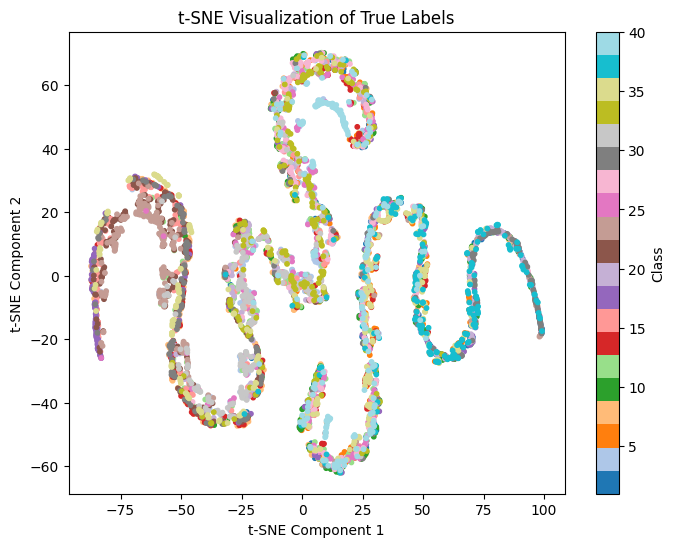

In [31]:
# Plot of T-SNE to show how features differentiate to each classes
plot_tsne(X, y)


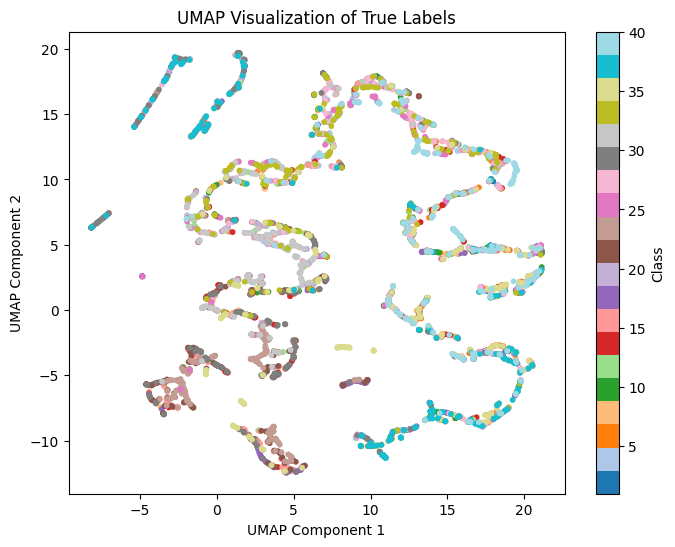

In [35]:
# Plot of UMAP to show how features differentiate to each classes
plot_umap(X, y)

In [38]:
X_train, X_test, y_train, y_test = split_data(X, y)

                         precision    recall  f1-score   support

 Hibiscus rosa-sinensis       0.95      0.97      0.96        37
        Psidium guajava       1.00      0.93      0.96        40
       Antidesma bunius       0.80      0.87      0.84        47
          Vitex negundo       1.00      0.98      0.99        44
       Moringa oleifera       1.00      0.96      0.98        49
     Blumea balsamifera       0.94      0.91      0.92        32
       Origanum vulgare       0.89      0.83      0.86        41
     Pepromia pellucida       0.97      0.91      0.94        34
      Centella asiatica       0.91      0.94      0.92        51
 Coleus scutellarioides       1.00      1.00      1.00        38
     Phyllanthus niruri       0.97      0.97      0.97        35
    Corchorus olitorius       0.98      0.88      0.93        51
    Momordica charantia       1.00      1.00      1.00        36
        Euphorbia hirta       0.83      0.93      0.87        41
          Curcuma longa 

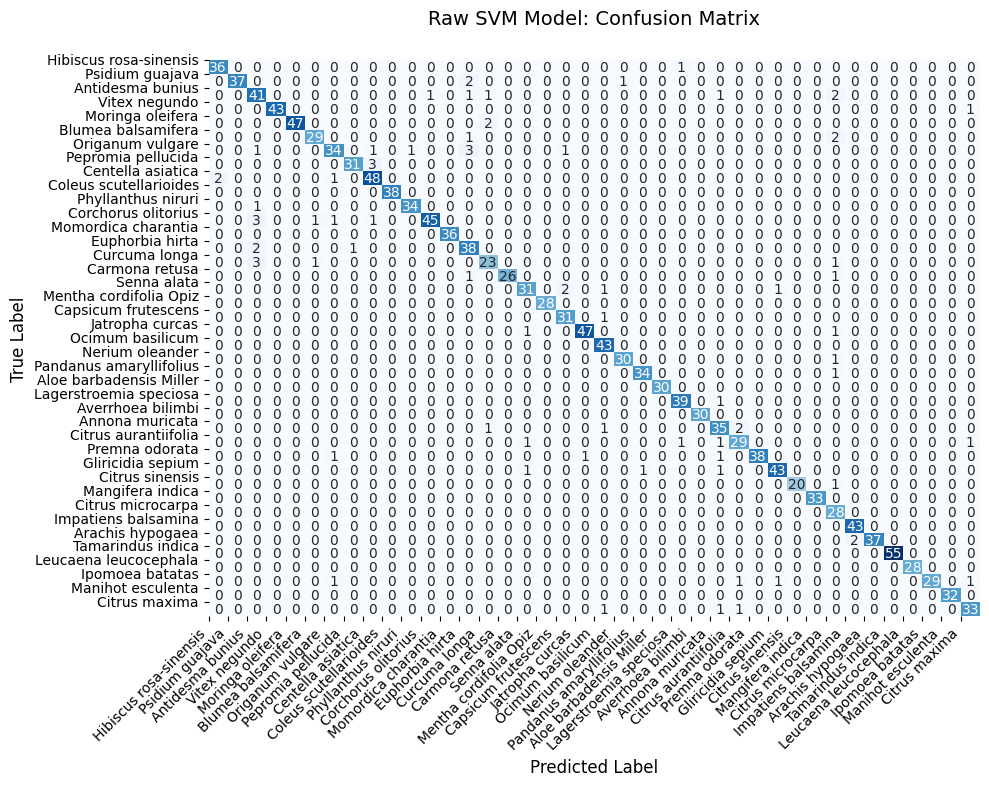

In [ ]:
# Raw SVM classification with Scaling
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

# Create pipeline with preprocessing and model
pipeline = Pipeline(
    [("scaler", StandardScaler()), ("classifier", svm_classifier)]
)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

create_classification_report(y_test, y_pred, target_names, 'Raw SVM Model')

In [61]:
import optuna

search_space = {
    "C": lambda trial: trial.suggest_loguniform("C", 1e-3, 1e3),
    "gamma": lambda trial: trial.suggest_loguniform("gamma", 1e-4, 1e1)
}

objective = generate_objective(X_train, y_train, pipeline, search_space, 'accuracy')

# Create an Optuna study
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50, timeout=600)

# Get the best parameters
best_params = study.best_params
print("Best Parameters:", best_params)

[I 2024-11-29 02:40:23,420] A new study created in memory with name: no-name-19c0cffa-1dd0-4ffa-a8ee-6ba5ad98866e
[I 2024-11-29 02:40:29,887] Trial 0 finished with value: 0.2604233854295874 and parameters: {'C': 0.8645371465137724, 'gamma': 0.07872611587410211}. Best is trial 0 with value: 0.2604233854295874.
[I 2024-11-29 02:40:36,045] Trial 1 finished with value: 0.03334284296700571 and parameters: {'C': 0.0037907315418125383, 'gamma': 0.12806301343164603}. Best is trial 0 with value: 0.2604233854295874.
[I 2024-11-29 02:40:42,554] Trial 2 finished with value: 0.5357888861324733 and parameters: {'C': 519.2645805267882, 'gamma': 0.06410366987841437}. Best is trial 2 with value: 0.5357888861324733.
[I 2024-11-29 02:40:50,004] Trial 3 finished with value: 0.0873798891920946 and parameters: {'C': 126.30821159015925, 'gamma': 0.17395204244483264}. Best is trial 2 with value: 0.5357888861324733.
[I 2024-11-29 02:40:55,079] Trial 4 finished with value: 0.9074410816174648 and parameters: {'C

Best Parameters: {'C': 826.1581841849112, 'gamma': 0.00031410111190632704}


                         precision    recall  f1-score   support

 Hibiscus rosa-sinensis       1.00      0.95      0.97        37
        Psidium guajava       0.97      0.93      0.95        40
       Antidesma bunius       0.92      0.94      0.93        47
          Vitex negundo       1.00      1.00      1.00        44
       Moringa oleifera       1.00      0.98      0.99        49
     Blumea balsamifera       0.97      0.94      0.95        32
       Origanum vulgare       1.00      0.98      0.99        41
     Pepromia pellucida       0.97      0.97      0.97        34
      Centella asiatica       0.98      1.00      0.99        51
 Coleus scutellarioides       1.00      1.00      1.00        38
     Phyllanthus niruri       1.00      0.97      0.99        35
    Corchorus olitorius       0.98      0.98      0.98        51
    Momordica charantia       1.00      1.00      1.00        36
        Euphorbia hirta       0.95      1.00      0.98        41
          Curcuma longa 

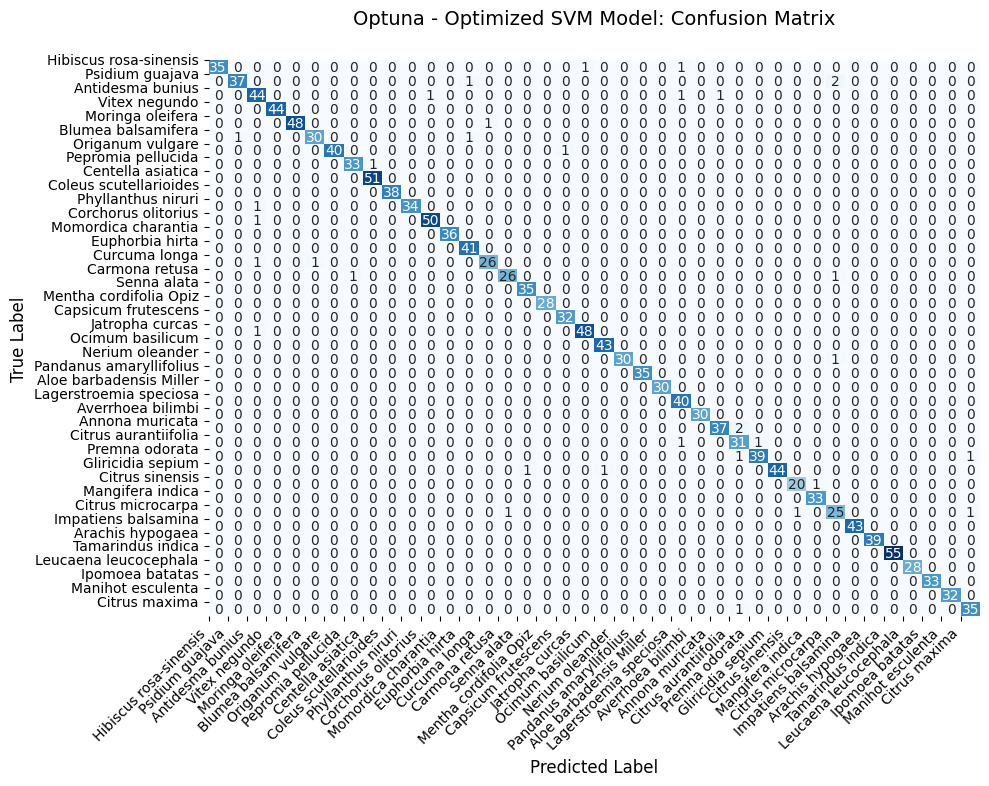

In [ ]:
# Update the classifier with the best parameters from Optuna
classifier = SVC(**best_params, random_state=42)
pipeline = Pipeline([("scaler", StandardScaler()), ("classifier", classifier)])

# Train and evaluate the final model
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Generate classification report
create_classification_report(y_test, y_pred, target_names, "Optuna - Optimized SVM Model")

In [71]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Standardize the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Standardize features

# Convert NumPy array to PyTorch Tensor
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)

# Create DataLoader
batch_size = 32
dataset = TensorDataset(X_tensor)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Step 2: Define Autoencoder Architecture
class Autoencoder(nn.Module):
    def __init__(self, input_dim, encoding_dim):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, encoding_dim),
            nn.ReLU()
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, input_dim),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

# Initialize Autoencoder
input_dim = 371
encoding_dim = 50  # Desired reduced dimensionality
autoencoder = Autoencoder(input_dim, encoding_dim)

# Step 3: Define Loss and Optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

# Step 4: Train the Autoencoder
epochs = 50
autoencoder.train()

for epoch in range(epochs):
    epoch_loss = 0
    for batch in dataloader:
        data = batch[0]  # Get data from DataLoader
        optimizer.zero_grad()
        
        # Forward pass
        _, reconstructed = autoencoder(data)
        
        # Compute loss
        loss = criterion(reconstructed, data)
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
    
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss / len(dataloader):.4f}")

# Step 5: Extract Reduced Features
autoencoder.eval()
with torch.no_grad():
    encoded_features, _ = autoencoder(torch.tensor(X_tensor))
    
# Convert to numpy array for further use
reduced_features = encoded_features.numpy()
print("Reduced feature shape:", reduced_features.shape)  # Should be (4700, 50)

Epoch [1/50], Loss: 0.8218
Epoch [2/50], Loss: 0.7322
Epoch [3/50], Loss: 0.7082
Epoch [4/50], Loss: 0.6844
Epoch [5/50], Loss: 0.6713
Epoch [6/50], Loss: 0.6616
Epoch [7/50], Loss: 0.6553
Epoch [8/50], Loss: 0.6497
Epoch [9/50], Loss: 0.6458
Epoch [10/50], Loss: 0.6438
Epoch [11/50], Loss: 0.6403
Epoch [12/50], Loss: 0.6498
Epoch [13/50], Loss: 0.6332
Epoch [14/50], Loss: 0.6344
Epoch [15/50], Loss: 0.6302
Epoch [16/50], Loss: 0.6277
Epoch [17/50], Loss: 0.6245
Epoch [18/50], Loss: 0.6208
Epoch [19/50], Loss: 0.6206
Epoch [20/50], Loss: 0.6206
Epoch [21/50], Loss: 0.6192
Epoch [22/50], Loss: 0.6184
Epoch [23/50], Loss: 0.6163
Epoch [24/50], Loss: 0.6149
Epoch [25/50], Loss: 0.6137
Epoch [26/50], Loss: 0.6126
Epoch [27/50], Loss: 0.6117
Epoch [28/50], Loss: 0.6098
Epoch [29/50], Loss: 0.6089
Epoch [30/50], Loss: 0.6081
Epoch [31/50], Loss: 0.6067
Epoch [32/50], Loss: 0.6059
Epoch [33/50], Loss: 0.6047
Epoch [34/50], Loss: 0.6041
Epoch [35/50], Loss: 0.6026
Epoch [36/50], Loss: 0.6040
E

                         precision    recall  f1-score   support

 Hibiscus rosa-sinensis       0.95      0.95      0.95        37
        Psidium guajava       0.97      0.88      0.92        40
       Antidesma bunius       0.77      0.87      0.82        47
          Vitex negundo       1.00      0.95      0.98        44
       Moringa oleifera       0.96      0.96      0.96        49
     Blumea balsamifera       0.88      0.91      0.89        32
       Origanum vulgare       0.81      0.61      0.69        41
     Pepromia pellucida       0.94      0.85      0.89        34
      Centella asiatica       0.83      0.96      0.89        51
 Coleus scutellarioides       1.00      1.00      1.00        38
     Phyllanthus niruri       0.94      0.97      0.96        35
    Corchorus olitorius       0.93      0.78      0.85        51
    Momordica charantia       0.94      0.94      0.94        36
        Euphorbia hirta       0.80      0.90      0.85        41
          Curcuma longa 

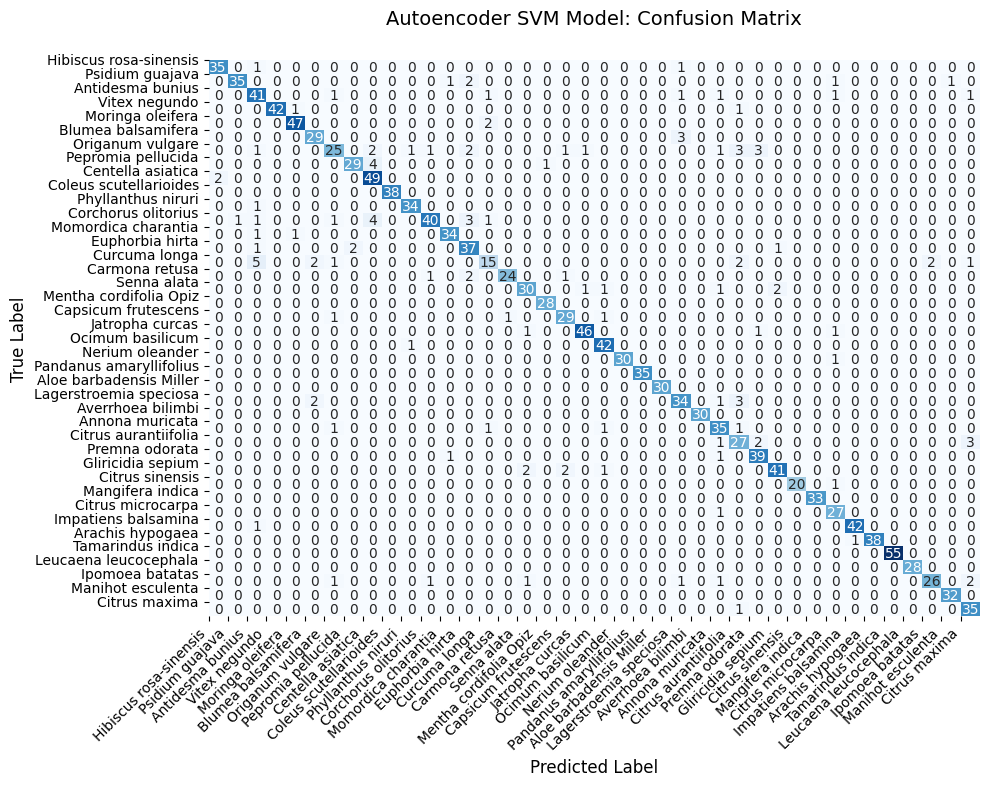

In [73]:
X_red_train, X_red_test, y_red_train, y_red_test = split_data(reduced_features, y)

svm_classifier = SVC()

# Train and evaluate the final model
svm_classifier.fit(X_red_train, y_red_train)
y_pred = svm_classifier.predict(X_red_test)

# Generate classification report
create_classification_report(y_test, y_pred, target_names, "Autoencoder SVM Model")

In [74]:
search_space = {
    "C": lambda trial: trial.suggest_loguniform("C", 1e-3, 1e3),
    "gamma": lambda trial: trial.suggest_loguniform("gamma", 1e-4, 1e1)
}

svm_classifier = SVC()
objective = generate_objective(X_red_train, y_red_train, svm_classifier, search_space, 'accuracy')

# Create an Optuna study
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50, timeout=600)

# Get the best parameters
best_params = study.best_params
print("Best Parameters:", best_params)

[I 2024-11-29 03:15:24,944] A new study created in memory with name: no-name-00ec6cae-ab1f-449b-9be6-b1979452fd0a
[I 2024-11-29 03:15:30,869] Trial 0 finished with value: 0.0344926817166956 and parameters: {'C': 80.39510290048158, 'gamma': 1.9984767457193804}. Best is trial 0 with value: 0.0344926817166956.
[I 2024-11-29 03:15:33,511] Trial 1 finished with value: 0.03334284296700571 and parameters: {'C': 0.012889605698268834, 'gamma': 0.009634313716460589}. Best is trial 0 with value: 0.0344926817166956.
[I 2024-11-29 03:15:36,365] Trial 2 finished with value: 0.8373021582733813 and parameters: {'C': 239.19653785126485, 'gamma': 0.006085644495770088}. Best is trial 2 with value: 0.8373021582733813.
[I 2024-11-29 03:15:37,310] Trial 3 finished with value: 0.9407835111221367 and parameters: {'C': 17.502349689546328, 'gamma': 0.00018699865975203882}. Best is trial 3 with value: 0.9407835111221367.
[I 2024-11-29 03:15:39,815] Trial 4 finished with value: 0.5674013892334407 and parameters: 

Best Parameters: {'C': 2.6486953998048754, 'gamma': 0.000967527595690232}


                         precision    recall  f1-score   support

 Hibiscus rosa-sinensis       0.95      0.97      0.96        37
        Psidium guajava       1.00      0.93      0.96        40
       Antidesma bunius       0.93      0.85      0.89        47
          Vitex negundo       0.96      0.98      0.97        44
       Moringa oleifera       1.00      0.96      0.98        49
     Blumea balsamifera       0.88      0.94      0.91        32
       Origanum vulgare       0.93      0.95      0.94        41
     Pepromia pellucida       0.97      0.85      0.91        34
      Centella asiatica       0.89      0.96      0.92        51
 Coleus scutellarioides       1.00      1.00      1.00        38
     Phyllanthus niruri       0.97      0.97      0.97        35
    Corchorus olitorius       0.94      0.86      0.90        51
    Momordica charantia       1.00      1.00      1.00        36
        Euphorbia hirta       0.95      0.95      0.95        41
          Curcuma longa 

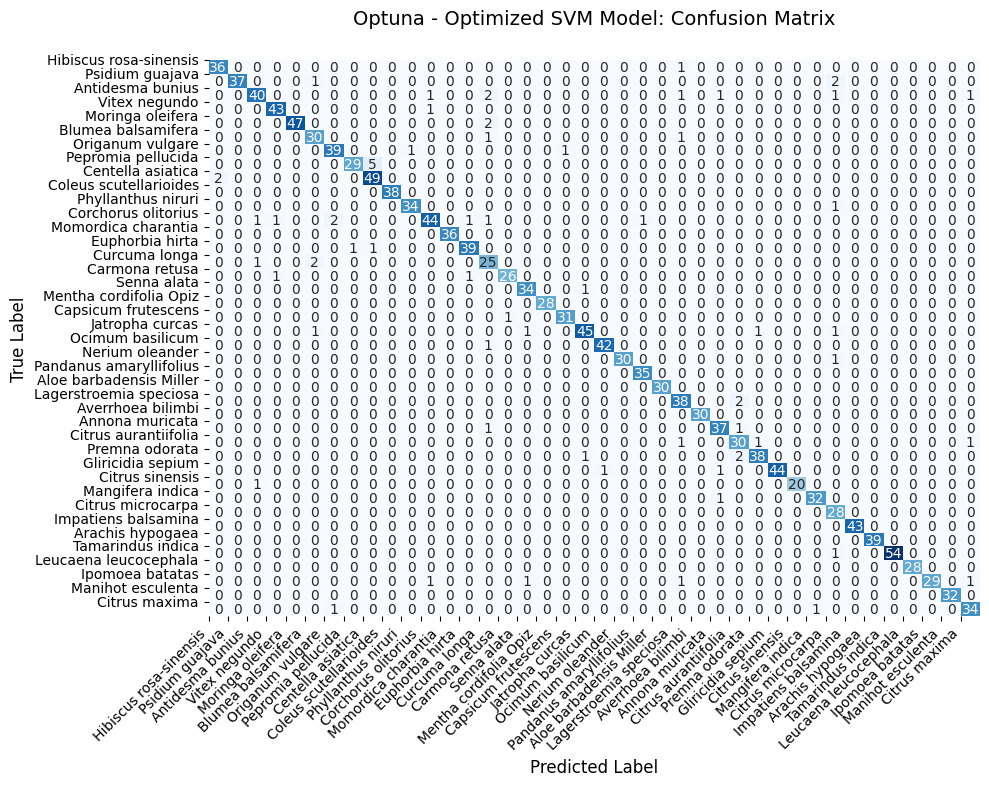

In [76]:
# Update the classifier with the best parameters from Optuna
classifier = SVC(**best_params, random_state=42)

# Train and evaluate the final model
classifier.fit(X_red_train, y_red_train)
y_pred = classifier.predict(X_red_test)

# Generate classification report
create_classification_report(y_red_test, y_pred, target_names, "Optuna - Optimized SVM Model")